In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

In [3]:
eigenFaces = np.load('olivetti_faces.npy')
grayScale = io.imread('hulki-okan-tabak-eY9wnVZOIWg-unsplash.jpg' , as_gray = True)

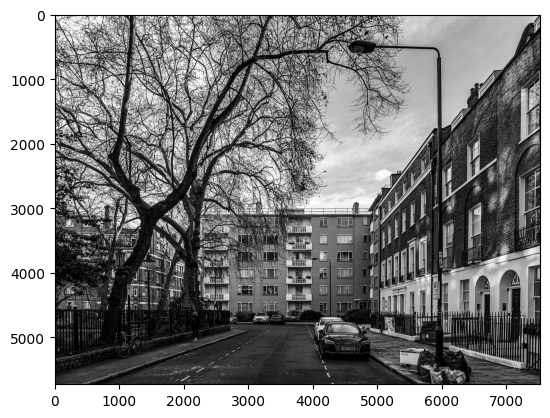

In [4]:
plt.imshow(grayScale , cmap='gray')

In [5]:
grayScale.shape

(5729, 7525)

In [11]:
class PCA:
    def __init__(self , n_components = None):
        self.n_components = n_components
        self.components = None
        self.df_mean = None
        self.df_std = None
    def fit(self , df):
        """
        
         df: An array of shape (n_samples, n_features).

        :return: None
        """
        # Data Standardization 
        self.df_mean = df.mean(axis = 0)
        self.df_std = df.std(axis = 0)
        self.standardized_df = (df - self.df_mean) / self.df_std
        
        # Transpose to calculate Covariance over Featured 
        cov_matrix = np.cov(self.standardized_df.T)
        
    
        eigenValues , eigenVectors = np.linalg.eig(cov_matrix)
    
        # sort Eigen Values in descending order and Save indices  
        sorted_ind = np.argsort(eigenValues)[::-1]
        self.components = eigenVectors[:, sorted_ind[:self.n_components]]
        print(f'Shape of Components is {self.components.shape}')
    def transform (self , df):
        # Data Standardization 
        standardized_df = (df - self.df_mean) / self.df_std
       
        # Project the data into the Eigen Vectors 
        projected_df = np.dot(standardized_df, self.components)
        
        return projected_df
    def inverse_transform (self , df):
        reconstructed_df = np.dot(df , self.components.T) + self.df_mean
        
        return reconstructed_df

        

In [12]:
pca2 = PCA(n_components=10)

In [13]:
pca2.fit(grayScale)

Shape of Components is (7525, 10)


In [14]:
new_image = pca2.transform(grayScale)

In [15]:
recons = pca2.inverse_transform(new_image)

In [16]:
new_image.shape

(5729, 10)

In [17]:
recons.shape

(5729, 7525)

C:\Users\aly86\AppData\Local\Temp\ipykernel_18744\3779238968.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(new_image.astype(float) , cmap='gray')
C:\Users\aly86\AppData\Local\Temp\ipykernel_18744\3779238968.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[2].imshow(recons.astype(float) , cmap='gray')


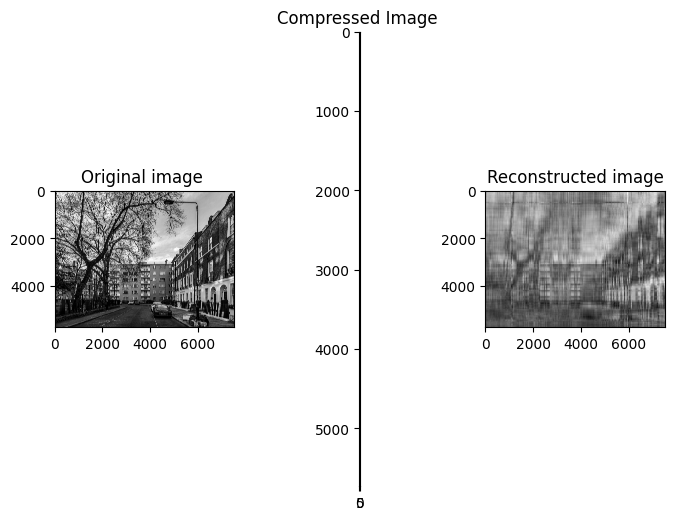

In [25]:
fig , ax = plt.subplots(1 , 3)

ax[0].imshow(grayScale , cmap='gray')
ax[0].set_title('Original image ')

ax[1].imshow(new_image.astype(float) , cmap='gray')
ax[1].set_title('Compressed Image ')


ax[2].imshow(recons.astype(float) , cmap='gray')
ax[2].set_title('Reconstructed image')

ax[0].set_aspect('equal')
ax[2].set_aspect('equal')

fig.set_size_inches(20 / 2.54, 15 / 2.54)

plt.show()